# **Task 1 : Iris Flower Classification**

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrixrr
from tabulate import tabulate

In [ ]:
# Load the Iris dataset
iris_data = pd.read_csv("Iris.csv")

# **Data Exploration**

In [ ]:
print(iris_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [ ]:
print(iris_data.describe())

               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.500000       5.800000      3.000000       4.350000      1.300000
75%    112.750000       6.400000      3.300000       5.100000      1.800000
max    150.000000       7.900000      4.400000       6.900000      2.500000


In [ ]:
print(iris_data['Species'].value_counts())

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64


In [ ]:
print("\nNull Values:")
print(iris_data.isnull().sum())


Null Values:
Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# **Data Preprocessing**

In [ ]:
# Preprocess the data
X = iris_data.drop('Species', axis=1)
y = iris_data['Species']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [ ]:
# Reset index for better consistency
X_train.reset_index(drop=True, inplace=True)
X_test.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

In [ ]:
# Encode categorical features
one = OneHotEncoder(sparse_output=False, handle_unknown="ignore")
one.fit(X_train.select_dtypes(include="object"))
X_train_cat = pd.DataFrame(one.transform(X_train.select_dtypes(include="object")), columns=one.get_feature_names_out())
X_test_cat = pd.DataFrame(one.transform(X_test.select_dtypes(include="object")), columns=one.get_feature_names_out())

In [ ]:
# Combine numerical and encoded categorical features
X_train1 = pd.concat([X_train.select_dtypes(include="number"), X_train_cat], axis=1)
X_test1 = pd.concat([X_test.select_dtypes(include="number"), X_test_cat], axis=1)

In [ ]:
# Standardize the features
sta = StandardScaler()
sta.fit(X_train1)
X_train1 = pd.DataFrame(sta.transform(X_train1), columns=X_train1.columns)
X_test1 = pd.DataFrame(sta.transform(X_test1), columns=X_test1.columns)

# **Visualizations**

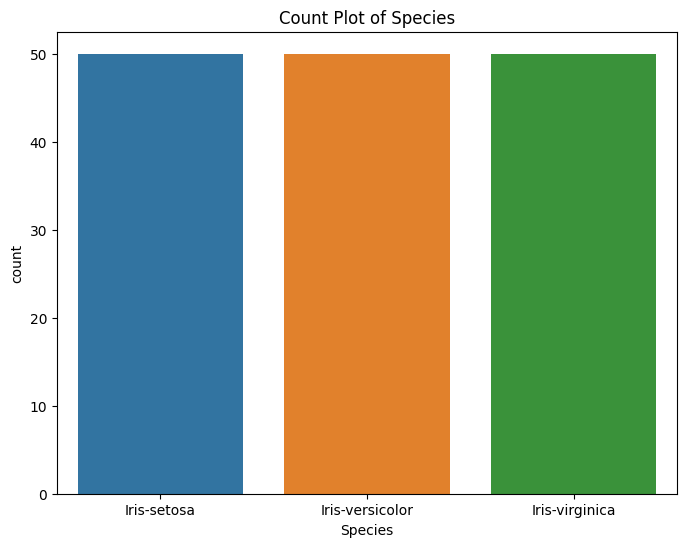

In [ ]:
# Visualizations
# Count Plot of Species
plt.figure(figsize=(8, 6))
sns.countplot(x='Species', data=iris_data)
plt.title('Count Plot of Species')
plt.show()

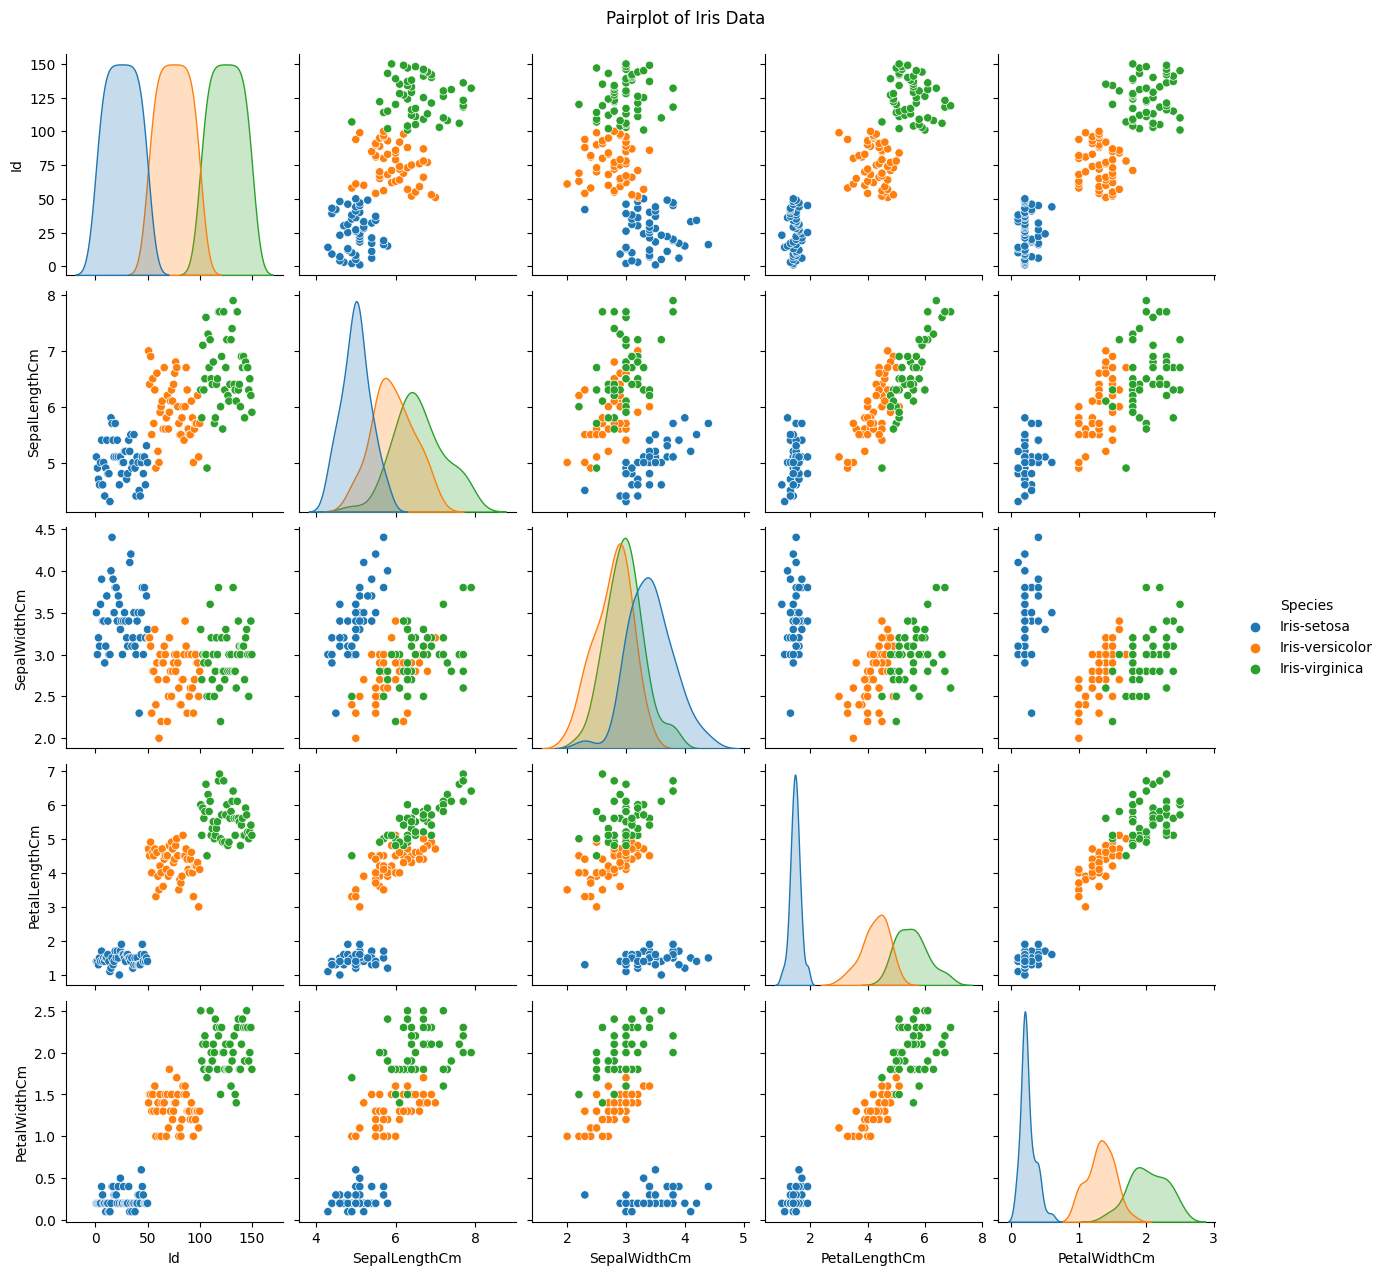

In [ ]:
# Pairplot
sns.pairplot(iris_data, hue='Species', markers='o')
plt.suptitle('Pairplot of Iris Data', y=1.02)
plt.show()

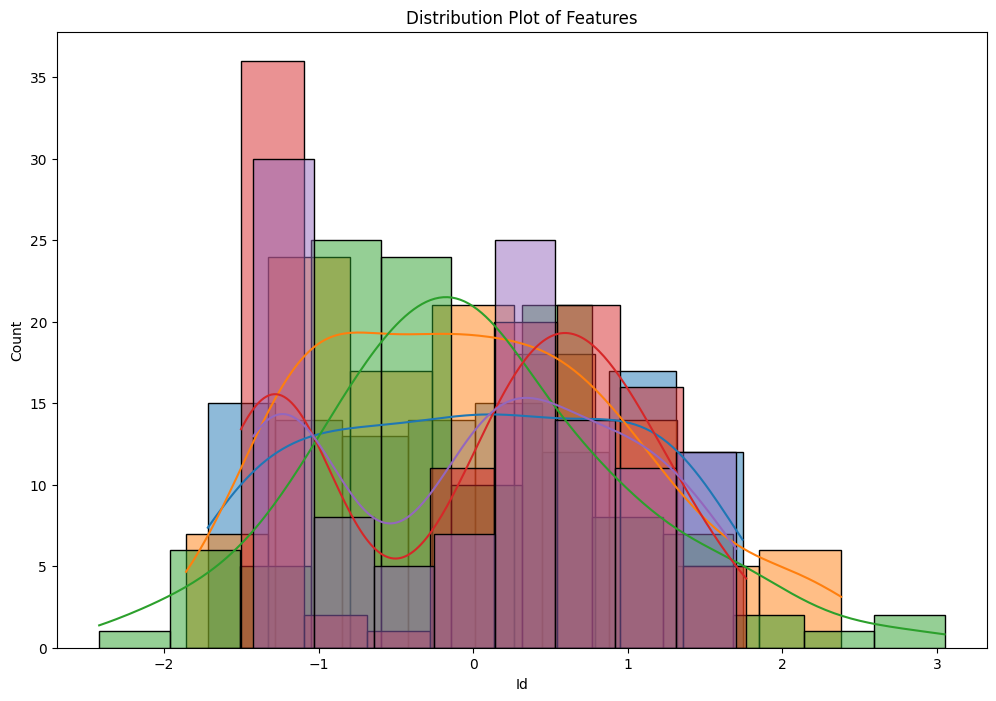

In [ ]:
# Dist Plot
plt.figure(figsize=(12, 8))
for i in X_train1.columns:
    sns.histplot(X_train1[i], kde=True)
plt.title('Distribution Plot of Features')
plt.show()

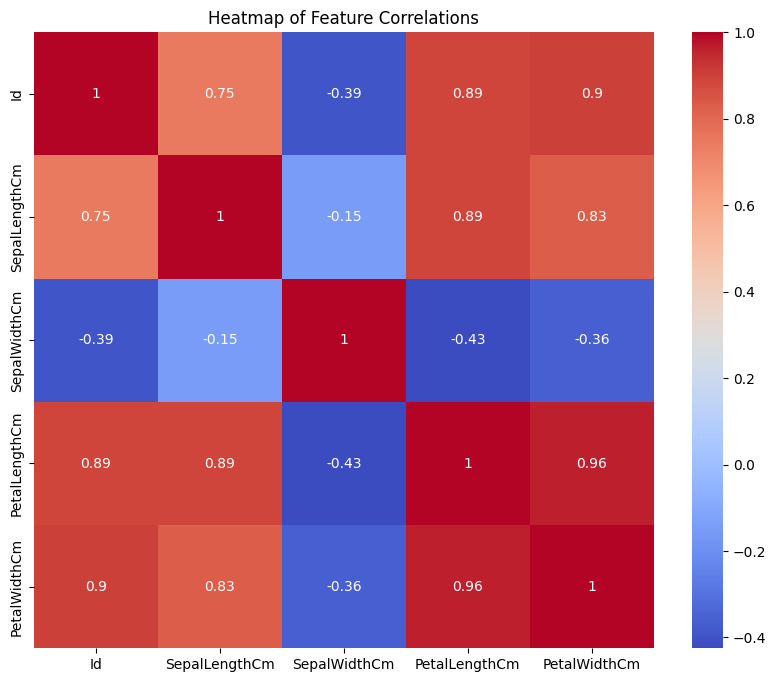

In [ ]:
# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(X_train1.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap of Feature Correlations')
plt.show()

# **Model Training and Evaluation**

In [ ]:
# Train and Evaluate K-Nearest Neighbors Model
knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_model.fit(X_train1, y_train)
pred_knn = knn_model.predict(X_test1)

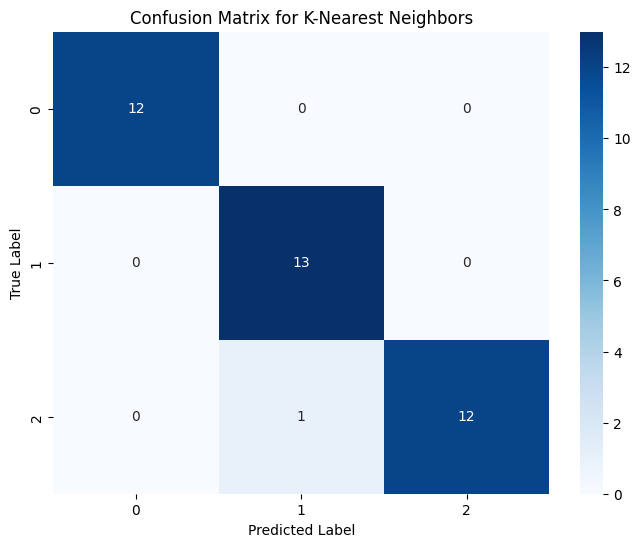

In [ ]:
# Confusion Matrix Plot for K-Nearest Neighbors
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for K-Nearest Neighbors')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Train and Evaluate Decision Tree Model
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train1, y_train)
pred_dec = dec_model.predict(X_test1)

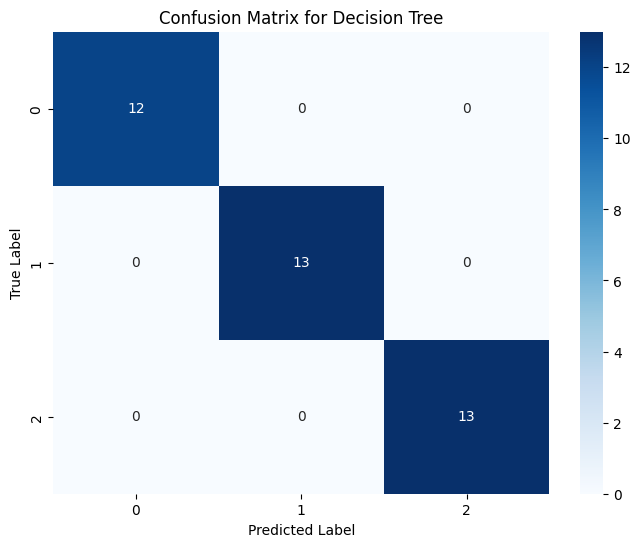

In [ ]:
# Confusion Matrix Plot for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred_dec), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Train and Evaluate Random Forest Model
raf_model = RandomForestClassifier()
raf_model.fit(X_train1, y_train)
pred_raf = raf_model.predict(X_test1)

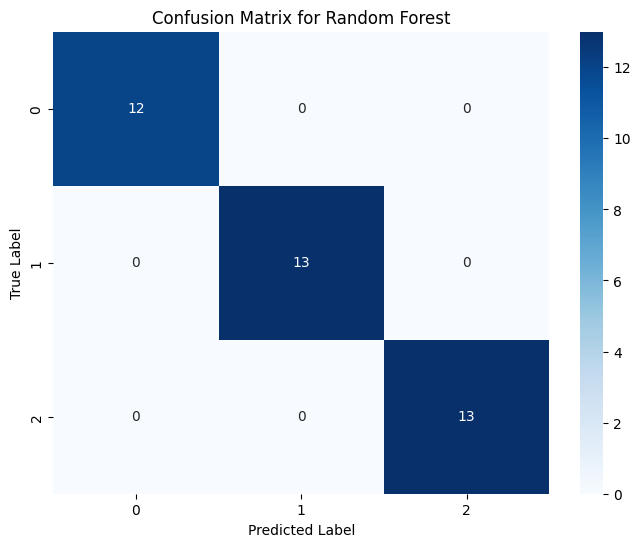

In [ ]:
# Confusion Matrix Plot for Random Forest
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred_raf), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Train and Evaluate Logistic Regression Model
log_model = LogisticRegression()
log_model.fit(X_train1, y_train)
pred_log = log_model.predict(X_test1)

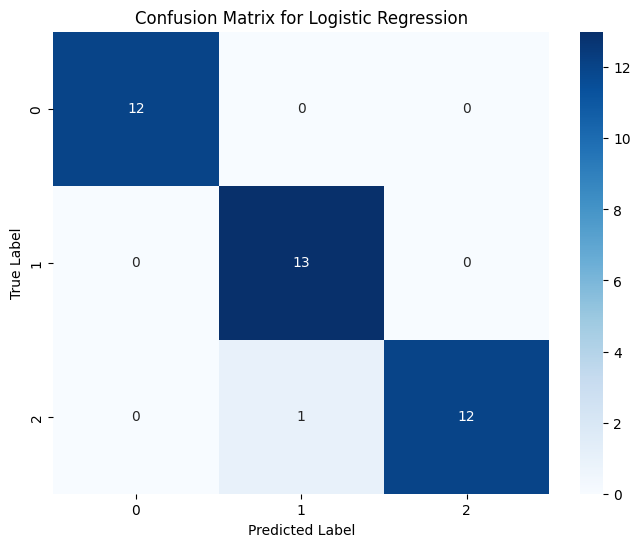

In [ ]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, pred_log), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
# Model Comparison
model_names = ["K-Nearest Neighbors", "Decision Tree", "Random Forest", "Logistic Regression"]
model_accuracies = [
    accuracy_score(pred_knn, y_test),
    accuracy_score(pred_dec, y_test),
    accuracy_score(pred_raf, y_test),
    accuracy_score(pred_log, y_test)
]


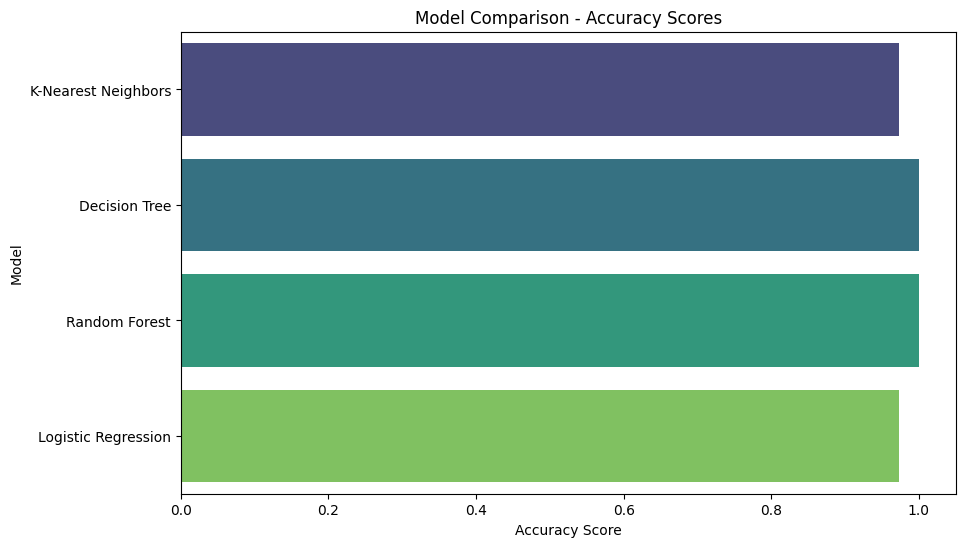

In [ ]:
# Bar plot for model comparison
plt.figure(figsize=(10, 6))
sns.barplot(x=model_accuracies, y=model_names, palette="viridis")
plt.title('Model Comparison - Accuracy Scores')
plt.xlabel('Accuracy Score')
plt.ylabel('Model')
plt.show()

In [ ]:
# Model Comparison
model_results = [
    ["K-Nearest Neighbors", accuracy_score(pred_knn, y_test)],
    ["Decision Tree", accuracy_score(pred_dec, y_test)],
    ["Random Forest", accuracy_score(pred_raf, y_test)],
    ["Logistic Regression", accuracy_score(pred_log, y_test)]
]

print("\nModel Comparison:")
print(tabulate(model_results, headers=["Model", "Accuracy"], tablefmt="grid"))



Model Comparison:
+---------------------+------------+
| Model               |   Accuracy |
+=====================+============+
| K-Nearest Neighbors |   0.973684 |
+---------------------+------------+
| Decision Tree       |   1        |
+---------------------+------------+
| Random Forest       |   1        |
+---------------------+------------+
| Logistic Regression |   0.973684 |
+---------------------+------------+


In [ ]:
# Identify the model with the highest accuracy
best_model = model_names[model_accuracies.index(max(model_accuracies))]
print(f"The model with the highest accuracy is: {best_model} (Accuracy: {max(model_accuracies):.4f})")

The model with the highest accuracy is: Decision Tree (Accuracy: 1.0000)
